# WordCloud

In [3]:
# !pip install konlpy
import re
import konlpy
import pandas as pd

In [1]:
#'과제_뉴스 기사' 텍스트 불러오고 string으로 읽기
with open('과제_뉴스 기사.txt', encoding='utf-8') as f:  #본인 디렉토리에 맞게 설정해주세요!
    text = f.readlines()
    

In [4]:
text_strip = [i.strip() for i in text if i != '\n']
text_join = ' '.join(text_strip)
#빈 줄과 양 끝단의 공백 제거
p = re.compile(r'\bclass\b')
filtered_content = re.sub(r'[^\d\s\w]', ' ', text_join)
#원하는 형태소 분석기로 pos 태깅, morphs, 그리고 명사만 모아놓은 변수 만들어보기
okt = konlpy.tag.Okt()
okt_pos = okt.pos(filtered_content)

komoran = konlpy.tag.Komoran()
komoran.morphs(filtered_content)

komoran_nouns = komoran.nouns(filtered_content)

#이메일, 날짜 등 불용어 제거
from nltk.corpus import stopwords
stop_words = ['이오', '에다', '하오', '마오'] #한국어로 할 때는 직접 설정.
unique_Noun_words = set(komoran_nouns)
for word in unique_Noun_words:
    if word in stop_words or len(word) == 1:  #한 글자짜리 단어는 알아보기 어려워서 제거.
        while word in komoran_nouns:
            komoran_nouns.remove(word)

#Counter 모듈로 빈도 분석
from collections import Counter
c = Counter(komoran_nouns)
c

Counter({'대출금': 1,
         '리도': 1,
         '사상': 4,
         '최저': 5,
         '은행': 7,
         '예금': 4,
         '금리': 17,
         '시대': 2,
         '연간': 1,
         '만원': 1,
         '얘기': 2,
         '적금': 1,
         '수단': 1,
         '안전': 1,
         '보관': 1,
         '금고': 1,
         '대출': 15,
         '역대': 5,
         '기록': 2,
         '주식': 3,
         '부동산': 2,
         '한국은행': 1,
         '발표': 1,
         '6월': 3,
         '금융': 1,
         '기관': 1,
         '가중': 1,
         '평균': 4,
         '지난달': 1,
         '전월': 3,
         '대비': 3,
         '포인트': 2,
         '처음': 2,
         '정기예금': 1,
         '상품': 1,
         '수준': 2,
         '코로나': 1,
         '사태': 1,
         '이후': 1,
         '한은': 2,
         '기준': 2,
         '집계': 1,
         '가계': 4,
         '신용': 7,
         '주택': 3,
         '담보': 1,
         '대로': 1,
         '이번': 1,
         '정부': 1,
         '규제': 1,
         '강화': 1,
         '사람': 2,
         '때문': 2,
         '관계자': 1,
         '대책': 1

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from os import path

## 한글폰트 다운로드
나눔 폰트를 다운 받고 font_path를 저장해주세요. 이후 plt.rc를 활용해 폰트를 지정해주세요.

In [7]:
import os

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

## 워드클라우드 시각화
단어별 빈도분석이 저장된 c 라는 객체를 WordCloud 시각화해주세요.

Hint: 
<br>wordcloud = WordCloud(~~~)
<br>wordcloud.generate_from_frequencies(c)
<br>wordcloud.to_image()
<br>잘 모르시겠으면 Notion에 업로드된 텍스트 마이닝의 워드클라우드 강의를 참고해주세요.

In [11]:
font = '/Library/Fonts/NanumSquareOTFLight.otf'

In [12]:
from wordcloud import WordCloud
word_cloud = WordCloud(font_path=font,background_color='black',max_font_size=400, colormap='prism').generate_from_frequencies(dict(c))

(-0.5, 399.5, 199.5, -0.5)

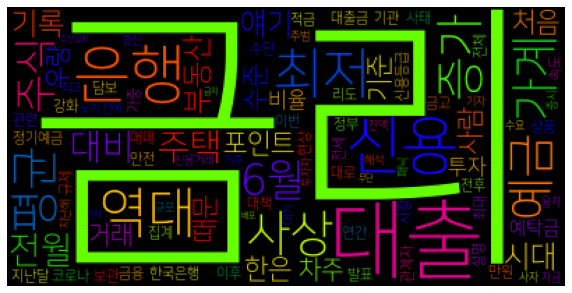

In [13]:
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')

# Bike Sharing Demand

출처: https://www.kaggle.com/c/bike-sharing-demand/data?select=train.csv

## Load Dataset

첨부된 train 데이터를 불러와주세요.

In [7]:
train = pd.read_csv("train.csv")

## 전처리
datetime의 data를 연/월/일/시간/분/초/요일로 쪼개서 새로운 컬럼에 담아주세요.
전처리 하고 나면 연 컬럼, 월 컬럼부터 초 컬럼, 요일 컬럼까지 총 7개의 컬럼이 추가 되어야합니다.
<br>Hint:파이썬에 내장된 .dt 함수를 활용해주세요.

In [9]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [15]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [19]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['weekday_name'] = train['datetime'].dt.weekday         

In [20]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2


datetime의 요일 컬럼을 사람이 알아보기 쉽게 Monday~Sunday로 바꿔주세요.
dt 함수를 사용하셨다면 다음과 같이 바꾸시면 됩니다.
<br> 0 = Monday
<br> 1 = Tuesday
<br> 2 = Wednesday
<br> 3 = Thursday
<br> 4 = Friday
<br> 5 = Saturday
<br> 6 = Sunday

In [27]:
weekday_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekday_list.index('Tuesday')

1

In [28]:
weekday_list[0]

'Monday'

In [30]:
weekday_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

def change_to_weekdayname(x):
    return weekday_list[x]
    

train['weekday_name'] = train['weekday_name'].apply(change_to_weekdayname)

In [32]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,Wednesday


## 시각화



In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [37]:
import os

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

### 1)
연도별 자전거 대여량과 월별 자전거 대여량을 시각화 해주세요.

이후 각 시각화한 plot에서 각자 인사이트를 도출해주세요.

<br> 힌트: barchart, 계절

In [31]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,Wednesday


In [42]:
np.unique(train['year'])

array([2011, 2012], dtype=int64)

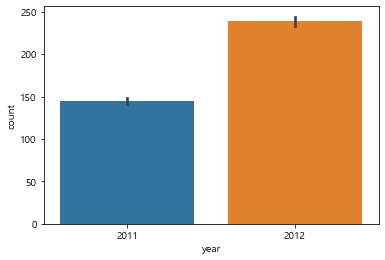

In [41]:
sns.barplot(data = train, x = 'year', y ='count')
plt.show()

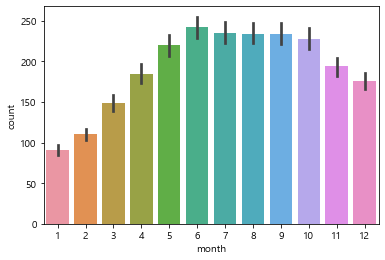

In [43]:
sns.barplot(data = train, x = 'month', y ='count')
plt.show()

2011년보다 2012년의 대여량이 많았다. <br>
겨울보다 여름에 대여량이 많았는데 이는 겨울에 자전거를 타기 쉽지 않기 때문인것 같다. 

###2)
연컬럼과 월컬럼을 합쳐주세요. 이후 2011년 1월부터 2012년 12월까지 월별 자전거 대여량을 시각화 해주세요. 

이전에 시각화한 월별 자전거 대여량 시각화 차트에서, 어째서 1월과 12월의 자전거 대여량의 차이가 크게 났는지 설명해주세요.

In [56]:
train['datetime'].dt.month.apply(str)

0         1
1         1
2         1
3         1
4         1
         ..
10881    12
10882    12
10883    12
10884    12
10885    12
Name: datetime, Length: 10886, dtype: object

In [60]:
train['year_month'] = train['datetime'].dt.year.apply(str) + "-" + train['datetime'].dt.month.apply(str)

<AxesSubplot:xlabel='year_month', ylabel='count'>

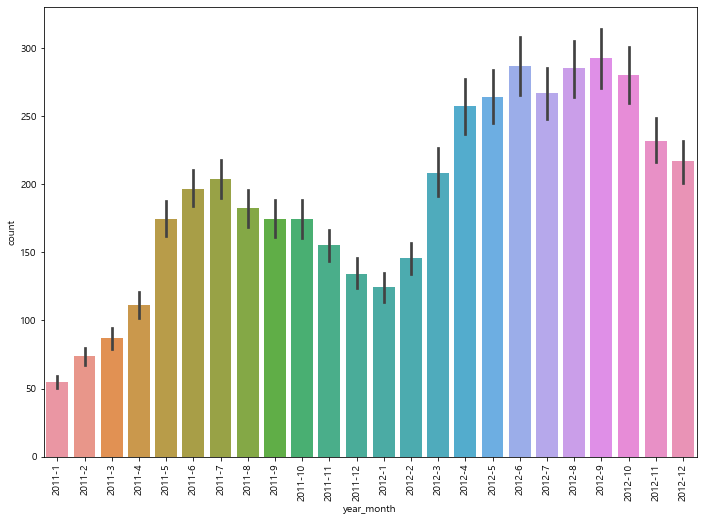

In [70]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

degrees = 90
plt.xticks(rotation=degrees)

sns.barplot(data = train, x = 'year_month', y ='count')

2011년과 2012년 각각 1월보다 12월의 대여량이 훨씬 많아서 데이터를 월별로 나타냈을 때 12월의 대여량이 압도적으로 많았음 

###3)
아래의 정보가 나타나게 시각화 해주세요.
<br>1) 시간별 자전거 대여량
<br>2) 근무일/휴일에 따른 시간별 자전거 대여량
<br>3) 요일에 따른 시간별 자전거 대여량

이 플랏에서 인사이트를 도출해주세요.

Hint: pointplot, hue

In [78]:
grouped = train['count'].groupby(train['hour'])
grouped.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: count, dtype: float64

In [89]:
grouped.mean()

array([ 55.13846154,  33.85903084,  22.89955357,  11.75750577,
         6.40723982,  19.76769912,  76.25934066, 213.11648352,
       362.76923077, 221.78021978, 175.09230769, 210.67472527,
       256.50877193, 257.7872807 , 243.44298246, 254.29824561,
       316.37280702, 468.76535088, 430.85964912, 315.27850877,
       228.51754386, 173.37061404, 133.57675439,  89.50877193])

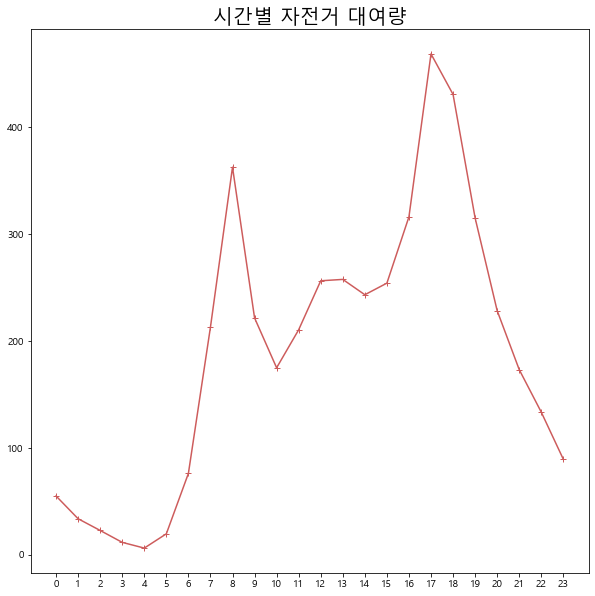

In [140]:

figure(figsize=(10,10))
plt.title('시간별 자전거 대여량', fontsize=20)
plt.xticks(range(0,24,1))
plt.plot(grouped.mean().index, grouped.mean().values, marker='+', color='indianred')

(근무일, 휴무일) 컬럼 만들기 

In [104]:
train['weekday_name'].unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [105]:
holiday_list = ['Saturday', 'Sunday']
def make_holiday_column(x):
    if x in holiday_list:
        return 'holiday'
    else:
        return 'workday'
    

In [107]:
train['work_or_holiday'] = train['weekday_name'].apply(make_holiday_column)

In [124]:
df1 = pd.pivot_table(train, index='hour', columns='work_or_holiday', values='count', aggfunc='mean')
df1

work_or_holiday,holiday,workday
hour,,
0,97.219697,37.941176
1,74.734848,17.102484
2,56.323077,9.235849
3,26.727273,5.192691
4,8.659091,5.448387
5,8.984496,24.074303
6,18.128788,100.015480
7,40.992424,283.458204
8,100.757576,469.845201


In [123]:
#train.groupby(['work_or_holiday', 'hour']).mean()['count']

In [127]:
df1.holiday.values

array([ 97.21969697,  74.73484848,  56.32307692,  26.72727273,
         8.65909091,   8.98449612,  18.12878788,  40.99242424,
       100.75757576, 174.63636364, 267.08333333, 330.36363636,
       385.09090909, 393.87121212, 384.40909091, 381.67424242,
       372.84848485, 336.28030303, 287.09848485, 238.61363636,
       180.32575758, 145.47727273, 121.57575758,  92.39393939])

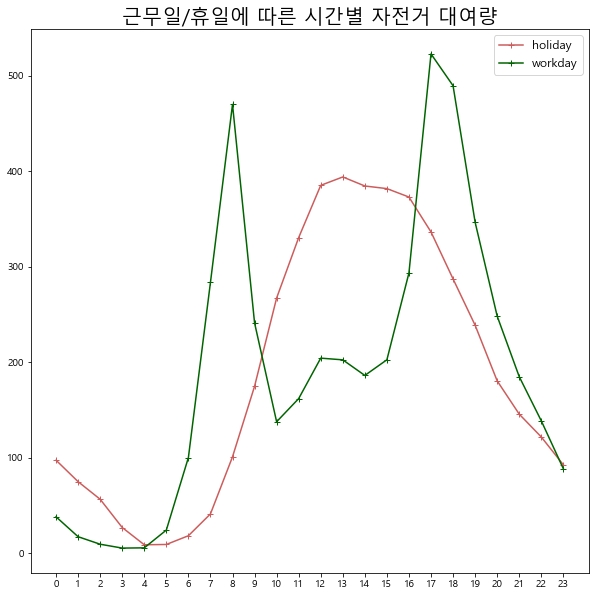

In [139]:

figure(figsize=(10,10))
plt.xticks(range(0,24,1))
plt.plot(df1.index, df1.holiday.values, marker='+', color='indianred')
plt.plot(df1.index, df1.workday.values, marker='+', color='darkgreen')

plt.title('근무일/휴일에 따른 시간별 자전거 대여량', fontsize=20)
plt.legend(['holiday', 'workday'], loc='upper right', fontsize=12)

plt.show()

요일에 따른 시간별 자전거 대여량

In [141]:
df2 = pd.pivot_table(train, index='hour', columns='weekday_name', values='count', aggfunc='mean')
df2

weekday_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,53.234375,35.492308,98.212121,96.227273,37.476923,27.328125,36.246154
1,24.453125,18.076923,70.015152,79.454545,15.415385,11.904762,15.615385
2,12.531250,10.666667,50.348485,62.484375,8.421875,6.203125,8.365079
3,6.322581,5.677966,23.060606,30.393939,4.868852,4.034483,5.000000
4,5.932203,6.140625,7.666667,9.651515,5.301587,5.241935,4.629032
5,23.375000,22.415385,8.515152,9.476190,25.507692,24.015625,25.046154
6,91.359375,89.246154,21.121212,15.136364,108.230769,105.375000,105.815385
7,254.109375,260.400000,47.242424,34.742424,307.692308,297.609375,297.246154
8,470.203125,428.107692,117.560606,83.954545,496.553846,469.171875,485.184615


In [144]:
df2.Friday.values

array([ 53.234375  ,  24.453125  ,  12.53125   ,   6.32258065,
         5.93220339,  23.375     ,  91.359375  , 254.109375  ,
       470.203125  , 262.40625   , 156.8125    , 186.828125  ,
       236.359375  , 243.28125   , 227.0625    , 248.453125  ,
       331.5       , 502.015625  , 427.59375   , 303.5625    ,
       216.796875  , 170.921875  , 152.625     , 119.546875  ])

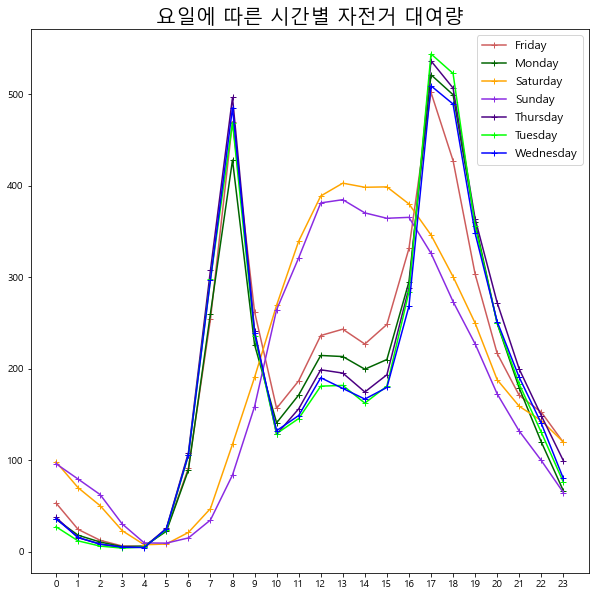

In [146]:

figure(figsize=(10,10))
plt.xticks(range(0,24,1))
plt.plot(df2.index, df2.Friday.values, marker='+', color='indianred')
plt.plot(df2.index, df2.Monday.values, marker='+', color='darkgreen')
plt.plot(df2.index, df2.Saturday.values, marker='+', color='orange')
plt.plot(df2.index, df2.Sunday.values, marker='+', color='blueviolet')
plt.plot(df2.index, df2.Thursday.values, marker='+', color='indigo')
plt.plot(df2.index, df2.Tuesday.values, marker='+', color='lime')
plt.plot(df2.index, df2.Wednesday.values, marker='+', color='b')

plt.title('요일에 따른 시간별 자전거 대여량', fontsize=20)
plt.legend(df2.columns, loc='upper right', fontsize=12)

plt.show()

휴일에는 낮에 대여량이 많은걸로 보아 외출해서 휴식할 때 많이 사용하는것 같고, 근무일에는 출근시간과 퇴근시간에 이용량이 많았다. 

# mpg


## Load Dataset
seaborn을 이용해 'mpg'데이터셋을 불러와주세요.

In [148]:
mpg = sns.load_dataset('mpg')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## 시각화

model_year과 mpg 데이터 값을 산점도로 보여주고, 그 간의 선형관계를 선으로 보여주세요.
<br> Hint: regplot

In [150]:
mpg['model_year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

<AxesSubplot:xlabel='model_year', ylabel='mpg'>

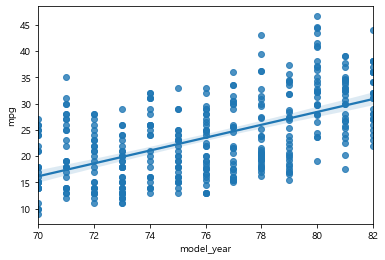

In [149]:
sns.regplot(x='model_year', y='mpg', data=mpg)

너무너무 고생 많으셨습니다!! 시각화 세션 화이팅하세요ㅎㅎㅎ
